In [1]:
from astropy.io import fits
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
test=1
TEST_COVARIANCE=True
PLOTS=True

In [3]:
Nbins=200
Nmeasures=100  # 10000
measures=[]

In [22]:
for i in np.arange(Nmeasures)+1:
    fname = f'/home/vale/Documents/MAAAAAAAG/ABILITÀINF/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{i}.fits'

    file = fits.open(fname)
    table = file[1].data.copy()
    measures.append(table['XI0'])
    if i==1:
        scale = table['SCALE']
    del table
    file.close()

measures=np.asarray(measures).transpose()

AttributeError: 'numpy.ndarray' object has no attribute 'append'

mean_xi   = np.mean(measures,axis=1)
cov_xi = np.cov(measures)

In [14]:
mean_xi   = np.mean(measures,axis=1)
cov_xi = np.cov(measures)

In [15]:
if TEST_COVARIANCE:
    print('Running test to see if I understand the covariance:')

    AVE = np.zeros((Nbins,),dtype=float)
    COV = np.zeros((Nbins,Nbins),dtype=float)

    for i in range(Nmeasures):
        AVE += measures[:,i]
    AVE /= Nmeasures

    for i in range(Nbins):
        for j in range(Nbins):
            COV[i,j] = (np.sum(measures[i]*measures[j]) - AVE[i]*AVE[j]*Nmeasures) / (Nmeasures-1)

    print('Largest deviation between my calculation and numpy: {}'.format(np.max(np.abs(COV-cov_xi))))

Running test to see if I understand the covariance:
Largest deviation between my calculation and numpy: 2.7962766650790893e-14


In [16]:
# correlation matrix
corr_xi = np.zeros((Nbins,Nbins),dtype=float)
for i in range(Nbins):
    for j in range(Nbins):
        corr_xi[i,j]=cov_xi[i,j]/(cov_xi[i,i]*cov_xi[j,j])**0.5

In [17]:
if test==1:
    sigs = [0.02, 0.02, 0.02]
    ls = [25, 50, 75]
elif test==2:
    sigs = [0.02, 0.01, 0.005]
    ls = [50, 50, 50]
else:
    sigs = [0.02, 0.01, 0.005]
    ls = [5, 5, 5]

In [18]:
## Definitions to build the covarince matrices based on Squared Exponential kernel
def covf(x1, x2, sig, l):
    return sig**2.*np.exp(-(x1 - x2)**2./(2.*l**2.))

def covf1f2(x1, x2, sig1, l1, sig2, l2):
    return (np.sqrt(2.*l1*l2)*np.exp(-(np.sqrt((x1 - x2)**2.)**2./(l1**2. + l2**2.)))*sig1*sig2)/np.sqrt(l1**2. + l2**2.)

In [19]:
cov_th = np.zeros((Nbins,Nbins),dtype=float)
for i in range(Nbins):
    for j in range(Nbins):
        cov_th[i,j] = covf(scale[i],scale[j],sigs[0],ls[0])

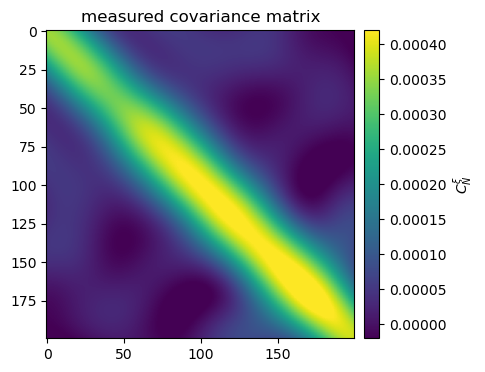

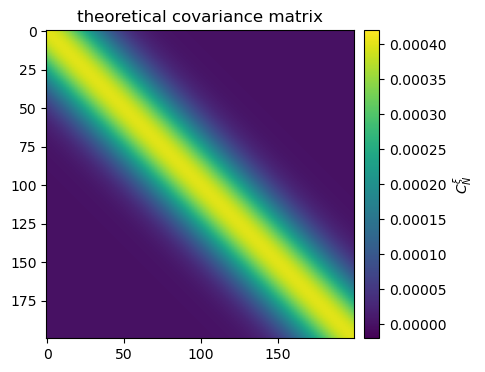

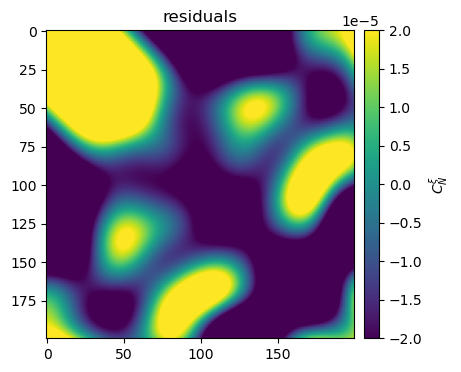

In [20]:
if PLOTS:

    gratio = (1. + 5. ** 0.5) / 2.

    dpi = 300
    #climit=max(np.max(theoretical_covariance),np.max(measured_covariance))
    cmin = -np.max(cov_th)*0.05
    cmax =  np.max(cov_th)*1.05

    # Matrix plot of measured covariance matrix
    fig = plt.figure(figsize=(6,4))
    plt.title('measured covariance matrix')
    plt.imshow(cov_xi, vmin=cmin, vmax=cmax)
    cbar = plt.colorbar(orientation="vertical", pad=0.02)
    cbar.set_label(r'$ C^{\xi}_{N}$')
    # PLOTNAME = 'Test%s_Measured_Matrix.png'%test
    # plt.savefig(PLOTNAME,dpi = dpi)
    plt.show()


    # Matrix plot of theoretical covariance matrix
    fig = plt.figure(figsize=(6,4))
    plt.title('theoretical covariance matrix')
    plt.imshow(cov_th, vmin=cmin, vmax=cmax)
    cbar = plt.colorbar(orientation="vertical", pad=0.02)
    cbar.set_label(r'$ C^{\xi}_{N}$')
    # PLOTNAME = 'Test%s_Measured_Matrix.png'%test
    # plt.savefig(PLOTNAME,dpi = dpi)
    plt.show()

    # Matrix plot of theoretical covariance matrix
    fig = plt.figure(figsize=(6,4))
    plt.title('residuals')
    plt.imshow(cov_th-cov_xi, vmin=cmin, vmax=-cmin)
    cbar = plt.colorbar(orientation="vertical", pad=0.02)
    cbar.set_label(r'$ C^{\xi}_{N}$')
    # PLOTNAME = 'Test%s_Measured_Matrix.png'%test
    # plt.savefig(PLOTNAME,dpi = dpi)
    plt.show()

In [21]:
norm_residuals = np.zeros_like(cov_th)
for i in range(Nbins):
    for j in range(Nbins):
        rho2 = cov_th[i,j]**2./(np.sqrt(cov_th[i,i]*cov_th[j,j])**2.)
        norm_residuals[i,j]=(cov_th[i,j]-cov_xi[i,j])*np.sqrt((Nmeasures-1.)/((1.+rho2)*cov_th[i,i]*cov_th[j,j]))

rms_deviation=np.std(norm_residuals.reshape(Nbins**2))

print(f"rms deviation of normalized residuals: {rms_deviation}")

if rms_deviation<1.1:
    print("**********")
    print("* PASSED *")
    print("**********")
else:
    print("!!!!!!!!!!")
    print("! FAILED !")
    print("!!!!!!!!!!")

rms deviation of normalized residuals: 0.6400407221689814
**********
* PASSED *
**********
